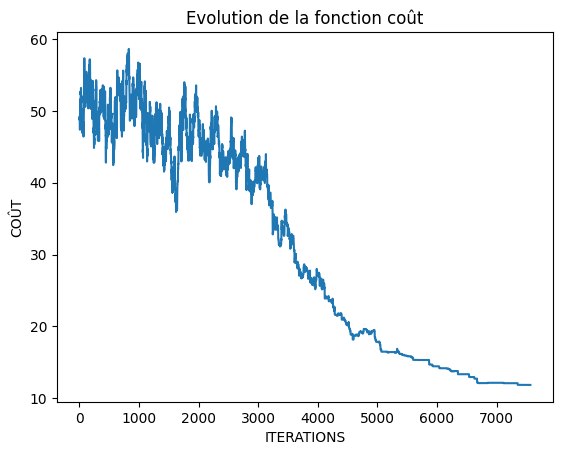

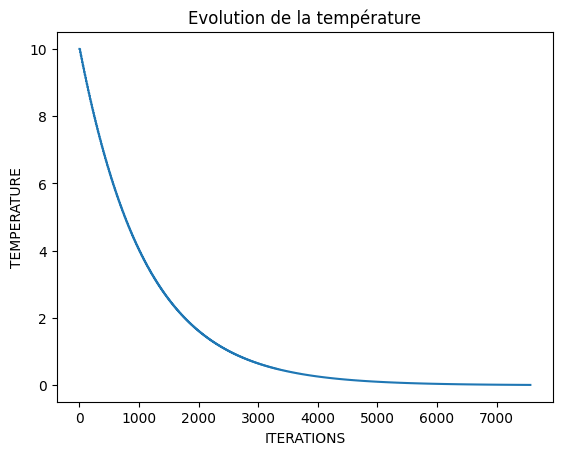

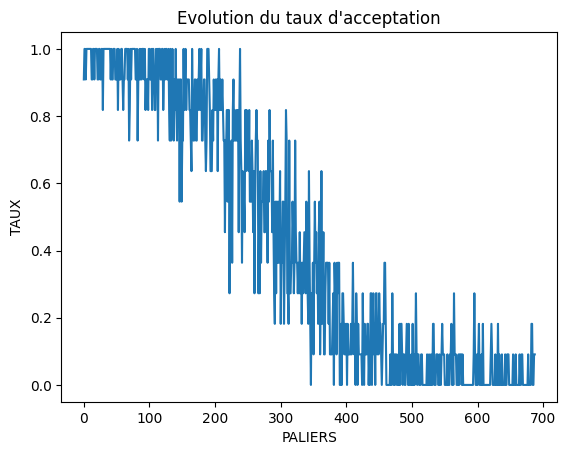

Temps de Calcul = 0.6872577667236328
Distance optimisée la meilleure obtenue = 11.864449885914905


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Réglages recuit simulé
Temp = 10  # Température initiale puis courante (décroit au cours de l'algorithme)
TempGel = 0.01  # Température de gel (fixe); constitue un critère d'arrêt
alpha = 0.99 # Taux de décroissance
kEquil = 11 # Nombre d'itération sur un palier de température

# Problème Voyageur de commerce; DEFINITION DES VILLES et paramétrages
# Nbr de villes
N = 50
np.random.seed(100)

# choix typologie des villes
# disposées sur un cercle si Cercle=True sinon aléatoire sur un carré Cercle=False
Cercle = False
if Cercle:
    rad = np.random.rand(N) * 2 * np.pi
    xpos = np.cos(rad)
    ypos = np.sin(rad)
else:
    # coord. x et y des positions des villes sur un carre -1,1
    xpos = 2 * np.random.rand(N) - 1
    ypos = 2 * np.random.rand(N) - 1

# calcul préliminaire des distances euclidiennes entre ville : tableau NxN
dx2 = ((xpos[:, None] - xpos) ** 2)
dy2 = ((ypos[:, None] - ypos) ** 2)
distance = np.sqrt(dx2 + dy2)

# Cycle aléatoire de DEPART (villes classées de 1 à N)
# La séquence des villes dépend du tirage initial
Cycle = np.arange(N)
np.random.shuffle(Cycle)

# Evaluation de la performance initiale
CoutCourant = np.sum([distance[Cycle[i], Cycle[i + 1]] for i in range(N - 1)])
CoutMeilleur = CoutCourant
CycleMeilleur = np.copy(Cycle)

# ALGORITHME DU RECUIT SIMULE proprement dit
start_time = time.time()

Tabcout = []
Tabtemp = []
Tabaccep = []

while Temp > TempGel:
    drap = 0
    for g in range(kEquil):  # Boucle sur l'équilibre
        Candidat = np.copy(Cycle)
        Ip = np.floor(1 + N * np.random.rand()).astype(int)
        Jp = np.floor(1 + N * np.random.rand()).astype(int)
        mx = max(Ip, Jp)
        mn = min(Ip, Jp)

        # Modif voisinage
        testV = np.random.rand()
        if testV < 0:
            Jp = Ip + 1
        # Fin modif

        Candidat[mn:mx + 1] = np.flip(Candidat[mn:mx + 1])
        CoutCandidat = np.sum([distance[Candidat[i], Candidat[i + 1]] for i in range(N - 1)])

        x = np.random.rand()

        if x < np.exp(- (CoutCandidat - CoutCourant) / Temp):
            Cycle = np.copy(Candidat)
            CoutCourant = CoutCandidat
            drap += 1

        if CoutCourant < CoutMeilleur:
            CoutMeilleur = CoutCourant
            CycleMeilleur = np.copy(Cycle)

        Tabcout.append(CoutCourant)
        Tabtemp.append(Temp)

    Tabaccep.append(drap / kEquil)
    Temp *= alpha

end_time = time.time()
temps_calcul = end_time - start_time

# Tracé des graphiques
plt.figure(1)
plt.plot(Tabcout)
plt.title("Evolution de la fonction coût")
plt.xlabel('ITERATIONS')
plt.ylabel('COÛT')

plt.figure(2)
plt.plot(Tabtemp)
plt.title("Evolution de la température")
plt.xlabel('ITERATIONS')
plt.ylabel('TEMPERATURE')

plt.figure(3)
plt.plot(Tabaccep)
plt.title("Evolution du taux d'acceptation")
plt.xlabel('PALIERS')
plt.ylabel('TAUX')

plt.show()

print("Temps de Calcul =", temps_calcul)
print("Distance optimisée la meilleure obtenue =", CoutMeilleur)

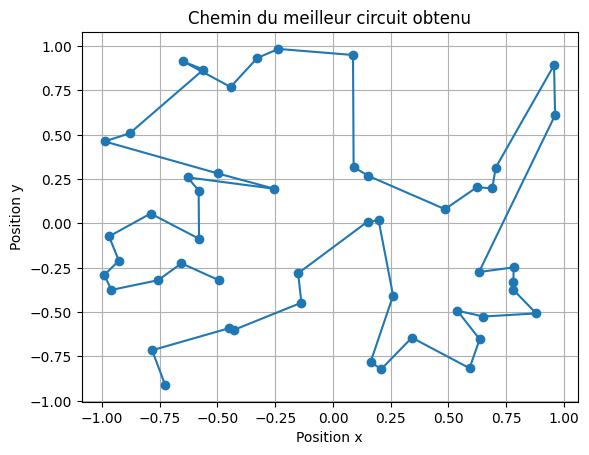

In [ ]:
# Affichage du graphe du meilleur circuit obtenu
plt.plot(xpos[CycleMeilleur], ypos[CycleMeilleur], marker='o')
plt.title('Chemin du meilleur circuit obtenu')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def recuit_simule(Temp, TempGel, alpha, kEquil, N, distance):
    np.random.seed(10)
    Cycle = np.arange(N)
    np.random.shuffle(Cycle)

    CoutCourant = np.sum([distance[Cycle[i], Cycle[i + 1]] for i in range(N - 1)])
    CoutMeilleur = CoutCourant
    CycleMeilleur = np.copy(Cycle)

    while Temp > TempGel:
        for g in range(kEquil):
            Candidat = np.copy(Cycle)
            Ip = np.floor(1 + N * np.random.rand()).astype(int)
            Jp = np.floor(1 + N * np.random.rand()).astype(int)
            mx = max(Ip, Jp)
            mn = min(Ip, Jp)
            Candidat[mn:mx + 1] = np.flip(Candidat[mn:mx + 1])
            CoutCandidat = np.sum([distance[Candidat[i], Candidat[i + 1]] for i in range(N - 1)])
            x = np.random.rand()
            if x < np.exp(- (CoutCandidat - CoutCourant) / Temp):
                Cycle = np.copy(Candidat)
                CoutCourant = CoutCandidat
                if CoutCourant < CoutMeilleur:
                    CoutMeilleur = CoutCourant
                    CycleMeilleur = np.copy(Cycle)
        Temp *= alpha

    return CoutMeilleur

# Paramètres à tester
parametres = [
    (100, 90, 0.99, 20),  # Paramètres initiaux
    (10, 0.01, 0.75, 20),
    (10, 0.01, 0.99, 10),
    (10, 0.01, 0.99, 12),
    (10, 0.01, 0.99, 11),
    (15, 0.01, 0.99, 12),
    (17, 0.01, 0.75, 20),
    (20, 0.01, 0.75, 10),
    (12, 0.1, 0.99, 11),
    (9, 0.01, 0.9, 20),
    (8, 0.01, 0.8, 10),
]

# Données du problème
N = 50
np.random.seed(10)
xpos = 2 * np.random.rand(N) - 1
ypos = 2 * np.random.rand(N) - 1
dx2 = ((xpos[:, None] - xpos) ** 2)
dy2 = ((ypos[:, None] - ypos) ** 2)
distance = np.sqrt(dx2 + dy2)

# Recherche des paramètres optimaux
meilleur_parametre = None
meilleur_distance = float('inf')

for parametre in parametres:
    Temp, TempGel, alpha, kEquil = parametre
    distance_optimale = recuit_simule(Temp, TempGel, alpha, kEquil, N, distance)
    if distance_optimale < meilleur_distance:
        meilleur_distance = distance_optimale
        meilleur_parametre = parametre

print("Meilleur paramètre :", meilleur_parametre)
print("Distance optimisée la meilleure obtenue :", meilleur_distance)

Meilleur paramètre : (10, 0.01, 0.99, 11)
Distance optimisée la meilleure obtenue : 11.36095071086594
